In [1]:
import sqlite3
import pandas as pd
import time
import datetime
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
conn = sqlite3.connect('tutorial.db')
c = conn.cursor()

In [3]:
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS stuffToPlot(unix REAL, datestamp TEXT, keyword TEXT, value REAL )')
    # This will create a database names stufftoplot

def data_entry():
    c.execute("INSERT INTO stuffToplot VALUES(145672, '2016-01-01', 'Python',5)") # It will update the values in the database
    conn.commit() 
    #after making any changes to the databse, you need to commit them
    #c.close()
    #conn.close()

create_table()
data_entry()

In [4]:
#Now lets just not hard code the things instead use dyanamic variables
def dyanamic_data_entry():
    unix = time.time()
    date = str(datetime.datetime.fromtimestamp(unix).strftime('%Y-%m-%d %H:%M:%S'))
    keyword = 'Python'
    value = random.randrange(0,10)
    c.execute("INSERT INTO stuffToPlot (unix, datestamp, keyword, value) VALUES(?, ?, ?, ?)",  
             (unix, date, keyword, value))
    conn.commit()
    
for i in range(10):
    dyanamic_data_entry()
    time.sleep(1) #we don't need that butwe want timestamp to go up ny 1 sec

#c.close()
#conn.close()
    

In [5]:
def read_from_db():
    c.execute('SELECT * FROM stuffToPlot')
    #data = c.fetchall()
    #print(data)
    for row in c.fetchall():
        print(row)
#read_from_db()

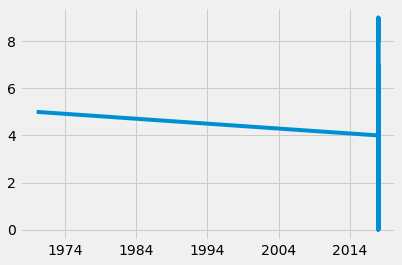

In [6]:
#Graphical visualization of the sqlite database
def graph_data():
    c.execute('SELECT unix, value FROM stuffToPlot')
    dates = []
    values = []
    for row in c.fetchall():
        dates.append(datetime.datetime.fromtimestamp(row[0]))
        values.append(row[1])
        
    plt.plot_date(dates, values,'-')
    plt.show()

graph_data()


In [7]:
#Update some stuff
def update():
    c.execute("SELECT * FROM stuffToPlot")
    [print(row) for row in c.fetchall()]
    
    c.execute('UPDATE stuffToPlot SET value = 99 WHERE value=3')
    conn.commit()
    print()
    c.execute("SELECT * FROM stuffToPlot")
    [print(row) for row in c.fetchall()]
    
update()

(145672.0, '2016-01-01', 'Python', 5.0)
(1515458504.03649, '2018-01-09 06:11:44', 'Python', 4.0)
(1515458505.043137, '2018-01-09 06:11:45', 'Python', 7.0)
(1515458506.0464158, '2018-01-09 06:11:46', 'Python', 0.0)
(1515458507.0530062, '2018-01-09 06:11:47', 'Python', 4.0)
(1515458508.0622458, '2018-01-09 06:11:48', 'Python', 9.0)
(1515458509.065475, '2018-01-09 06:11:49', 'Python', 8.0)
(1515458510.0685802, '2018-01-09 06:11:50', 'Python', 9.0)
(1515458511.078007, '2018-01-09 06:11:51', 'Python', 3.0)
(1515458512.085801, '2018-01-09 06:11:52', 'Python', 0.0)
(1515458513.115272, '2018-01-09 06:11:53', 'Python', 2.0)

(145672.0, '2016-01-01', 'Python', 5.0)
(1515458504.03649, '2018-01-09 06:11:44', 'Python', 4.0)
(1515458505.043137, '2018-01-09 06:11:45', 'Python', 7.0)
(1515458506.0464158, '2018-01-09 06:11:46', 'Python', 0.0)
(1515458507.0530062, '2018-01-09 06:11:47', 'Python', 4.0)
(1515458508.0622458, '2018-01-09 06:11:48', 'Python', 9.0)
(1515458509.065475, '2018-01-09 06:11:49', '

In [9]:
#Deletion from the data
def delete_edit():
    c.execute("SELECT * FROM stuffToPlot")
    [print(row) for row in c.fetchall()]
    
    c.execute('DELETE FROM stuffToPlot WHERE value = 99')
    conn.commit()
    print(50*'#')
    
    c.execute("SELECT * FROM stuffToPlot")
    [print(row) for row in c.fetchall()]

delete_edit()

##################################################
(145672.0, '2016-01-01', 'Python', 5.0)
(1515458504.03649, '2018-01-09 06:11:44', 'Python', 4.0)
(1515458505.043137, '2018-01-09 06:11:45', 'Python', 7.0)
(1515458506.0464158, '2018-01-09 06:11:46', 'Python', 0.0)
(1515458507.0530062, '2018-01-09 06:11:47', 'Python', 4.0)
(1515458508.0622458, '2018-01-09 06:11:48', 'Python', 9.0)
(1515458509.065475, '2018-01-09 06:11:49', 'Python', 8.0)
(1515458510.0685802, '2018-01-09 06:11:50', 'Python', 9.0)
(1515458512.085801, '2018-01-09 06:11:52', 'Python', 0.0)
(1515458513.115272, '2018-01-09 06:11:53', 'Python', 2.0)
